# Population Data

Data used in this notebook (onedrive link to each files):

1. Historical landing data: https://unimelbcloud-my.sharepoint.com/:u:/r/personal/eamanda_student_unimelb_edu_au/Documents/Applied%20Data%20Science%20Datasets/landing/2.%20population_data/historical/32180_ERP_2024_SA2_GDA2020.gpkg?csf=1&web=1&e=3tNQhM

2. Projected landing data: https://unimelbcloud-my.sharepoint.com/:x:/r/personal/eamanda_student_unimelb_edu_au/Documents/Applied%20Data%20Science%20Datasets/landing/2.%20population_data/projected/VIF2023_SA2_Pop_Hhold_Dwelling_Projections_to_2036_Release_2.xlsx?d=wa3edcad4574746ccb824e684d56563c6&csf=1&web=1&e=SP6uKV

3. Median Rental Data : https://unimelbcloud-my.sharepoint.com/:x:/r/personal/eamanda_student_unimelb_edu_au/Documents/Applied%20Data%20Science%20Datasets/landing/2.%20population_data/Moving%20annual%20median%20rent%20by%20suburb%20and%20town%20-%20March%20quarter%202025%20(2).xlsx?d=wd709b2b59a614a658ab64bf06556fa06&csf=1&web=1&e=bMJyI3

4. Mapping data : https://unimelbcloud-my.sharepoint.com/:x:/r/personal/eamanda_student_unimelb_edu_au/Documents/Applied%20Data%20Science%20Datasets/landing/raw/cleaned/6.%20excel%20to%20sa2/mapped_target_suburbs.csv?d=wbbfd7a3ad1e74d838b72c2bb0adb237f&csf=1&web=1&e=rSBLxV


In [2]:
# Libraries
import os
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import folium
import numpy as np
from pathlib import Path
import statsmodels.api as sm
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

## Historical Population Data

In [4]:
gdf = gpd.read_file("../../datasets/population_data/32180_ERP_2024_SA2_GDA2020.gpkg")
gdf.head()

,state_code_2021,state_name_2021,gccsa_code_2021,gccsa_name_2021,sa4_code_2021,sa4_name_2021,sa3_code_2021,sa3_name_2021,sa2_code_2021,sa2_name_2021,...,births_2023_24,deaths_2023_24,natural_increase_2023_24,internal_arrivals_2023_24,internal_departures_2023_24,net_internal_migration_2023_24,overseas_arrivals_2023_24,overseas_departures_2023_24,net_overseas_migration_2023_24,geometry
0,1,New South Wales,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021007,Braidwood,...,40,29,11,304,240,64,20,7,13,"MULTIPOLYGON (((149.58424 -35.44426, 149.58432..."
1,1,New South Wales,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021008,Karabar,...,121,39,82,763,932,-169,80,28,52,"MULTIPOLYGON (((149.21899 -35.36738, 149.21947..."
2,1,New South Wales,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021009,Queanbeyan,...,183,137,46,1164,1415,-251,245,85,160,"MULTIPOLYGON (((149.21326 -35.34325, 149.20804..."
3,1,New South Wales,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021010,Queanbeyan - East,...,86,22,64,600,711,-111,124,42,82,"MULTIPOLYGON (((149.24034 -35.34781, 149.2396 ..."
4,1,New South Wales,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021012,Queanbeyan West - Jerrabomberra,...,143,33,110,1168,1400,-232,194,66,128,"MULTIPOLYGON (((149.19572 -35.36126, 149.19348..."


In [5]:
print(gdf.columns)
gdf["state_name_2021"].unique()

Index(['state_code_2021', 'state_name_2021', 'gccsa_code_2021',
       'gccsa_name_2021', 'sa4_code_2021', 'sa4_name_2021', 'sa3_code_2021',
       'sa3_name_2021', 'sa2_code_2021', 'sa2_name_2021', 'erp_2001',
       'erp_2002', 'erp_2003', 'erp_2004', 'erp_2005', 'erp_2006', 'erp_2007',
       'erp_2008', 'erp_2009', 'erp_2010', 'erp_2011', 'erp_2012', 'erp_2013',
       'erp_2014', 'erp_2015', 'erp_2016', 'erp_2017', 'erp_2018', 'erp_2019',
       'erp_2020', 'erp_2021', 'erp_2022', 'erp_2023', 'erp_2024',
       'erp_change_number_2023_24', 'erp_change_per_cent_2023_24', 'area_km2',
       'pop_density_2024_people_per_km2', 'births_2021_22', 'deaths_2021_22',
       'natural_increase_2021_22', 'internal_arrivals_2021_22',
       'internal_departures_2021_22', 'net_internal_migration_2021_22',
       'overseas_arrivals_2021_22', 'overseas_departures_2021_22',
       'net_overseas_migration_2021_22', 'births_2022_23', 'deaths_2022_23',
       'natural_increase_2022_23', 'internal_arr

array(['New South Wales', 'Victoria', 'Queensland', 'South Australia',
       'Western Australia', 'Tasmania', 'Northern Territory',
       'Australian Capital Territory', 'Other Territories'], dtype=object)

In [6]:
# Filter to Victoria only
gdf_vic = gdf[gdf["state_name_2021"] == "Victoria"]

print(gdf_vic.shape)
gdf_vic.head()

(522, 66)


,state_code_2021,state_name_2021,gccsa_code_2021,gccsa_name_2021,sa4_code_2021,sa4_name_2021,sa3_code_2021,sa3_name_2021,sa2_code_2021,sa2_name_2021,...,births_2023_24,deaths_2023_24,natural_increase_2023_24,internal_arrivals_2023_24,internal_departures_2023_24,net_internal_migration_2023_24,overseas_arrivals_2023_24,overseas_departures_2023_24,net_overseas_migration_2023_24,geometry
642,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011001,Alfredton,...,232,61,171,2321,1470,851,167,54,113,"MULTIPOLYGON (((143.78282 -37.56666, 143.78299..."
643,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011002,Ballarat,...,86,129,-43,1312,1415,-103,159,51,108,"MULTIPOLYGON (((143.81896 -37.55582, 143.81886..."
644,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011005,Buninyong,...,45,32,13,567,613,-46,91,23,68,"MULTIPOLYGON (((143.84171 -37.61596, 143.84142..."
645,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011006,Delacombe,...,264,89,175,2422,1224,1198,49,16,33,"MULTIPOLYGON (((143.7505 -37.59119, 143.75052 ..."
646,2,Victoria,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011007,Smythes Creek,...,34,12,22,293,307,-14,4,1,3,"MULTIPOLYGON (((143.73296 -37.62333, 143.73103..."


In [7]:
# Drop unneeded columns
cols_to_drop = ['state_code_2021', 'state_name_2021', 'gccsa_code_2021',
       'gccsa_name_2021', 'sa4_name_2021', 'sa4_code_2021', 'sa3_code_2021',
       'sa3_name_2021', 'erp_2001',
       'erp_2002', 'erp_2003', 'erp_2004', 'erp_2005', 'erp_2006', 'erp_2007',
       'erp_2008', 'erp_2009', 'erp_2010', 'erp_2011', 'erp_2012', 'erp_2013',
       'erp_2014']

pop_vic = gdf_vic.drop(columns=cols_to_drop, errors="ignore")

print(pop_vic.shape)
pop_vic.head()

(522, 44)


,sa2_code_2021,sa2_name_2021,erp_2015,erp_2016,erp_2017,erp_2018,erp_2019,erp_2020,erp_2021,erp_2022,...,births_2023_24,deaths_2023_24,natural_increase_2023_24,internal_arrivals_2023_24,internal_departures_2023_24,net_internal_migration_2023_24,overseas_arrivals_2023_24,overseas_departures_2023_24,net_overseas_migration_2023_24,geometry
642,201011001,Alfredton,11039.0,11852,12649,13537,14434,15507,16841,18002,...,232,61,171,2321,1470,851,167,54,113,"MULTIPOLYGON (((143.78282 -37.56666, 143.78299..."
643,201011002,Ballarat,12300.0,12301,12266,12244,12320,12196,12071,11938,...,86,129,-43,1312,1415,-103,159,51,108,"MULTIPOLYGON (((143.81896 -37.55582, 143.81886..."
644,201011005,Buninyong,7191.0,7311,7409,7418,7458,7377,7229,7247,...,45,32,13,567,613,-46,91,23,68,"MULTIPOLYGON (((143.84171 -37.61596, 143.84142..."
645,201011006,Delacombe,6846.0,7195,7622,8183,8890,9755,10648,11798,...,264,89,175,2422,1224,1198,49,16,33,"MULTIPOLYGON (((143.7505 -37.59119, 143.75052 ..."
646,201011007,Smythes Creek,3966.0,3990,4004,4042,4112,4152,4211,4223,...,34,12,22,293,307,-14,4,1,3,"MULTIPOLYGON (((143.73296 -37.62333, 143.73103..."


In [8]:
# Rename for consistency
pop_vic.rename(columns={'sa2_code_2021': 'sa2_code','sa2_name_2021': 'sa2_name'},inplace=True)
pop_vic

,sa2_code,sa2_name,erp_2015,erp_2016,erp_2017,erp_2018,erp_2019,erp_2020,erp_2021,erp_2022,...,births_2023_24,deaths_2023_24,natural_increase_2023_24,internal_arrivals_2023_24,internal_departures_2023_24,net_internal_migration_2023_24,overseas_arrivals_2023_24,overseas_departures_2023_24,net_overseas_migration_2023_24,geometry
642,201011001,Alfredton,11039.0,11852,12649,13537,14434,15507,16841,18002,...,232,61,171,2321,1470,851,167,54,113,"MULTIPOLYGON (((143.78282 -37.56666, 143.78299..."
643,201011002,Ballarat,12300.0,12301,12266,12244,12320,12196,12071,11938,...,86,129,-43,1312,1415,-103,159,51,108,"MULTIPOLYGON (((143.81896 -37.55582, 143.81886..."
644,201011005,Buninyong,7191.0,7311,7409,7418,7458,7377,7229,7247,...,45,32,13,567,613,-46,91,23,68,"MULTIPOLYGON (((143.84171 -37.61596, 143.84142..."
645,201011006,Delacombe,6846.0,7195,7622,8183,8890,9755,10648,11798,...,264,89,175,2422,1224,1198,49,16,33,"MULTIPOLYGON (((143.7505 -37.59119, 143.75052 ..."
646,201011007,Smythes Creek,3966.0,3990,4004,4042,4112,4152,4211,4223,...,34,12,22,293,307,-14,4,1,3,"MULTIPOLYGON (((143.73296 -37.62333, 143.73103..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,217031476,Otway,3538.0,3556,3635,3710,3802,3911,3979,3974,...,26,36,-10,209,269,-60,51,16,35,"MULTIPOLYGON (((143.40263 -38.78152, 143.4028 ..."
1160,217041477,Moyne - East,6716.0,6709,6717,6746,6798,6883,6990,7046,...,82,52,30,475,516,-41,36,11,25,"MULTIPOLYGON (((142.41438 -38.09303, 142.39372..."
1161,217041478,Moyne - West,9467.0,9603,9686,9783,9845,9859,9967,10098,...,106,69,37,541,557,-16,68,21,47,"MULTIPOLYGON (((142.0087 -38.41715, 142.00871 ..."
1162,217041479,Warrnambool - North,21217.0,21442,21688,21954,22184,22416,22470,22586,...,254,166,88,1454,1534,-80,217,70,147,"MULTIPOLYGON (((142.43668 -38.35544, 142.43666..."


In [9]:
# Check for negative values
numeric_cols = pop_vic.select_dtypes(include='number')
negative_erp = pop_vic[numeric_cols.filter(like='erp').columns].lt(0).sum()
print("Negative population counts per column:\n", negative_erp)
print("Unique SA2 codes:", pop_vic["sa2_code"].nunique())


Negative population counts per column:
 erp_2015                        0
erp_2016                        0
erp_2017                        0
erp_2018                        0
erp_2019                        0
erp_2020                        0
erp_2021                        0
erp_2022                        0
erp_2023                        0
erp_2024                        0
erp_change_number_2023_24      50
erp_change_per_cent_2023_24    50
dtype: int64
Unique SA2 codes: 522


In [607]:
# Save to local
pop_vic.to_file("../datasets/raw/vic_population.gpkg", driver="GPKG")

## Projection Data (VIF)

In [608]:
vif_data_pop = pd.read_excel("../datasets/population_data/VIF2023_SA2_Pop_Hhold_Dwelling_Projections_to_2036_Release_2.xlsx", 
                                       sheet_name="Dwellings_and_Households", skiprows=9)
print(vif_data_pop.shape)
vif_data_pop.head()

(612, 34)


,GCCSA,SA4 Code,SA3 Code,SA2 code,Region Type,Region,2021,2026,2031,2036,...,2031.4,2036.4,2021.5,2026.5,2031.5,2036.5,2021.6,2026.6,2031.6,2036.6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2RVIC,201.0,20101.0,201011001.0,SA2,Alfredton,16841.0,20756.256163,23604.443836,26060.320807,...,2.575123,2.554885,6245.0,8252.000000,9732.000000,10830.000000,0.967833,0.935,0.935,0.935
2,2RVIC,201.0,20101.0,201011002.0,SA2,Ballarat,12071.0,11698.293593,11803.430603,11985.992387,...,1.975963,1.937952,5970.0,6134.548371,6350.037451,6553.095884,0.908190,0.895,0.895,0.895
3,2RVIC,201.0,20101.0,201011005.0,SA2,Buninyong,7229.0,7372.079773,7685.113372,8028.887243,...,2.475924,2.405964,2768.0,2943.325691,3199.637967,3445.433425,0.963041,0.940,0.940,0.940
4,2RVIC,201.0,20101.0,201011006.0,SA2,Delacombe,10648.0,15915.186041,20475.587469,24965.202439,...,2.421662,2.395607,4172.0,6585.376102,8740.266903,10770.851234,0.984004,0.955,0.955,0.955


In [609]:
new_columns = ['gcsa', 'sa4_code', 'sa3_code',
    "sa2_code", 'region_type', "region",
    "erp_2021", "erp_2026", "erp_2031", "erp_2036",
    "pnpd_2021", "pnpd_2026", "pnpd_2031", "pnpd_2036",
    "popd_2021", "popd_2026", "popd_2031", "popd_2036",
    "opd_2021", "opd_2026", "opd_2031", "opd_2036",
    "hhs_2021", "hhs_2026", "hhs_2031", "hhs_2036",
    "spd_2021", "spd_2026", "spd_2031", "spd_2036",
    "occ_2021", "occ_2026", "occ_2031", "occ_2036"
]

vif_data_pop.columns = new_columns

In [610]:
vif_data_pop['sa2_code'].isna().sum()

np.int64(90)

In [611]:
nan_sa2_only = vif_data_pop[vif_data_pop['sa2_code'].isna() & (vif_data_pop['region_type'] == 'SA2')]
nan_sa2_only[['sa2_code', 'region', 'region_type']]

,sa2_code,region,region_type


In [612]:
vif_data_pop = vif_data_pop.dropna(axis=1, how='all')
vif_data_pop = vif_data_pop.dropna(how='all')
vif_data_pop.drop(columns=['gcsa', 'sa4_code', 'sa3_code', 'region_type'], inplace=True)
vif_data_pop = vif_data_pop.dropna(subset=['sa2_code']).copy()
print(vif_data_pop.columns)
print("Unique SA2 codes:", vif_data_pop["sa2_code"].nunique())

Index(['sa2_code', 'region', 'erp_2021', 'erp_2026', 'erp_2031', 'erp_2036',
       'pnpd_2021', 'pnpd_2026', 'pnpd_2031', 'pnpd_2036', 'popd_2021',
       'popd_2026', 'popd_2031', 'popd_2036', 'opd_2021', 'opd_2026',
       'opd_2031', 'opd_2036', 'hhs_2021', 'hhs_2026', 'hhs_2031', 'hhs_2036',
       'spd_2021', 'spd_2026', 'spd_2031', 'spd_2036', 'occ_2021', 'occ_2026',
       'occ_2031', 'occ_2036'],
      dtype='object')
Unique SA2 codes: 522


## Median by Suburb Rental Data

In [613]:
median_rentals = pd.read_excel("../datasets/property/median_by_suburb/Moving annual median rent by suburb and town - March quarter 2025 (2).xlsx", sheet_name="All properties", skiprows= 1)
median_rentals

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Mar 2000,Mar 2000.1,Jun 2000,Jun 2000.1,Sep 2000,Sep 2000.1,Dec 2000,...,Mar 2024,Mar 2024.1,Jun 2024,Jun 2024.1,Sep 2024,Sep 2024.1,Dec 2024,Dec 2024.1,Mar 2025,Mar 2025.1
0,NaN,NaN,NaN,Count,Median,Count,Median,Count,Median,Count,...,Count,Median,Count,Median,Count,Median,Count,Median,Count,Median
1,Inner Melbourne,Albert Park-Middle Park-West St Kilda,,1143,260,1134,260,1177,270,1178,...,677,660,661,675,640,693,621,700,621,700
2,NaN,Armadale,,733,200,737,200,738,205,739,...,571,560,565,590,569,600,589,600,625,625
3,NaN,Carlton North,,864,260,814,260,799,265,736,...,391,680,381,690,389,680,379,700,371,720
4,NaN,Carlton-Parkville,,1303,251,1278,260,1280,260,1301,...,2619,570,2678,580,2681,585,2621,600,2643,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,NaN,Wanagaratta,,705,125,671,125,631,130,623,...,588,400,557,400,531,420,487,420,537,411
156,NaN,Warragul,,385,130,367,135,382,135,366,...,552,473,519,480,487,490,481,500,488,520
157,NaN,Warrnambool,,1266,130,1229,135,1204,135,1135,...,860,460,871,475,859,480,843,480,814,500
158,NaN,Wodonga,,1446,145,1439,145,1468,150,1449,...,1167,440,1175,450,1135,450,1156,460,1075,475


In [614]:
median_rentals = median_rentals.drop(median_rentals.columns[0], axis=1)
median_rentals = median_rentals.drop(median_rentals.columns[1], axis=1)
median_rentals

,Unnamed: 1,Mar 2000,Mar 2000.1,Jun 2000,Jun 2000.1,Sep 2000,Sep 2000.1,Dec 2000,Dec 2000.1,Mar 2001,...,Mar 2024,Mar 2024.1,Jun 2024,Jun 2024.1,Sep 2024,Sep 2024.1,Dec 2024,Dec 2024.1,Mar 2025,Mar 2025.1
0,NaN,Count,Median,Count,Median,Count,Median,Count,Median,Count,...,Count,Median,Count,Median,Count,Median,Count,Median,Count,Median
1,Albert Park-Middle Park-West St Kilda,1143,260,1134,260,1177,270,1178,275,1208,...,677,660,661,675,640,693,621,700,621,700
2,Armadale,733,200,737,200,738,205,739,210,718,...,571,560,565,590,569,600,589,600,625,625
3,Carlton North,864,260,814,260,799,265,736,270,718,...,391,680,381,690,389,680,379,700,371,720
4,Carlton-Parkville,1303,251,1278,260,1280,260,1301,260,1260,...,2619,570,2678,580,2681,585,2621,600,2643,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Wanagaratta,705,125,671,125,631,130,623,130,602,...,588,400,557,400,531,420,487,420,537,411
156,Warragul,385,130,367,135,382,135,366,135,365,...,552,473,519,480,487,490,481,500,488,520
157,Warrnambool,1266,130,1229,135,1204,135,1135,135,1069,...,860,460,871,475,859,480,843,480,814,500
158,Wodonga,1446,145,1439,145,1468,150,1449,150,1405,...,1167,440,1175,450,1135,450,1156,460,1075,475


In [615]:
# cap to 2015 above
median_rentals = median_rentals.drop(median_rentals.columns[1:121], axis=1)
median_rentals

,Unnamed: 1,Mar 2015,Mar 2015.1,Jun 2015,Jun 2015.1,Sep 2015,Sep 2015.1,Dec 2015,Dec 2015.1,Mar 2016,...,Mar 2024,Mar 2024.1,Jun 2024,Jun 2024.1,Sep 2024,Sep 2024.1,Dec 2024,Dec 2024.1,Mar 2025,Mar 2025.1
0,NaN,Count,Median,Count,Median,Count,Median,Count,Median,Count,...,Count,Median,Count,Median,Count,Median,Count,Median,Count,Median
1,Albert Park-Middle Park-West St Kilda,942,480,925,490,913,495,941,500,961,...,677,660,661,675,640,693,621,700,621,700
2,Armadale,680,400,663,399,663,400,659,400,653,...,571,560,565,590,569,600,589,600,625,625
3,Carlton North,535,530,529,530,541,530,561,530,544,...,391,680,381,690,389,680,379,700,371,720
4,Carlton-Parkville,2170,415,2429,440,2501,450,2510,450,2663,...,2619,570,2678,580,2681,585,2621,600,2643,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Wanagaratta,673,250,698,250,726,250,747,250,761,...,588,400,557,400,531,420,487,420,537,411
156,Warragul,495,280,506,280,507,280,499,280,502,...,552,473,519,480,487,490,481,500,488,520
157,Warrnambool,1407,280,1395,280,1406,290,1362,290,1409,...,860,460,871,475,859,480,843,480,814,500
158,Wodonga,1604,285,1592,285,1537,290,1515,290,1560,...,1167,440,1175,450,1135,450,1156,460,1075,475


In [616]:
new_cols = []
for col in median_rentals.columns:
    if ".1" in col:
        # Median column
        base = col.replace(".1", "").strip().split(" ")
        month, year = base[0].lower(), base[1]
        new_cols.append(f"median_{month}_{year}")
    else:
        # Count column
        base = col.strip().split(" ")
        month, year = base[0].lower(), base[1]
        new_cols.append(f"count_{month}_{year}")

median_rentals.columns = new_cols
median_rentals.rename(columns={'count_unnamed:_1': 'suburb'},inplace=True)
median_rentals = median_rentals.drop(median_rentals.index[0])

median_rentals

,suburb,count_mar_2015,median_mar_2015,count_jun_2015,median_jun_2015,count_sep_2015,median_sep_2015,count_dec_2015,median_dec_2015,count_mar_2016,...,count_mar_2024,median_mar_2024,count_jun_2024,median_jun_2024,count_sep_2024,median_sep_2024,count_dec_2024,median_dec_2024,count_mar_2025,median_mar_2025
1,Albert Park-Middle Park-West St Kilda,942,480,925,490,913,495,941,500,961,...,677,660,661,675,640,693,621,700,621,700
2,Armadale,680,400,663,399,663,400,659,400,653,...,571,560,565,590,569,600,589,600,625,625
3,Carlton North,535,530,529,530,541,530,561,530,544,...,391,680,381,690,389,680,379,700,371,720
4,Carlton-Parkville,2170,415,2429,440,2501,450,2510,450,2663,...,2619,570,2678,580,2681,585,2621,600,2643,600
5,CBD-St Kilda Rd,8776,450,8842,450,9146,450,9040,450,8622,...,13886,645,13517,650,13253,650,13028,650,13383,650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Wanagaratta,673,250,698,250,726,250,747,250,761,...,588,400,557,400,531,420,487,420,537,411
156,Warragul,495,280,506,280,507,280,499,280,502,...,552,473,519,480,487,490,481,500,488,520
157,Warrnambool,1407,280,1395,280,1406,290,1362,290,1409,...,860,460,871,475,859,480,843,480,814,500
158,Wodonga,1604,285,1592,285,1537,290,1515,290,1560,...,1167,440,1175,450,1135,450,1156,460,1075,475


In [617]:
median_rentals['suburb']

1      Albert Park-Middle Park-West St Kilda
2                                   Armadale
3                              Carlton North
4                          Carlton-Parkville
5                            CBD-St Kilda Rd
                       ...                  
155                              Wanagaratta
156                                 Warragul
157                              Warrnambool
158                                  Wodonga
159                              Group Total
Name: suburb, Length: 159, dtype: object

### Map Suburb to SA2 rental data

In [618]:
suburb_to_sa2 = pd.read_csv("../datasets/district_shape/sa2_lookup/mapped_target_suburbs.csv")  

median_rentals['suburb'] = median_rentals['suburb'].str.strip()
suburb_to_sa2['Target_Suburb'] = suburb_to_sa2['Target_Suburb'].str.strip()

# Merge rental data with SA2 mapping
rental_with_sa2 = median_rentals.merge(
    suburb_to_sa2[['Target_Suburb', 'SA2_CODE21', 'SA2_NAME21']],
    left_on='suburb',
    right_on='Target_Suburb',
    how='left'
)

rental_with_sa2 = rental_with_sa2.drop(columns=['Target_Suburb'])

rental_with_sa2.head()

,suburb,count_mar_2015,median_mar_2015,count_jun_2015,median_jun_2015,count_sep_2015,median_sep_2015,count_dec_2015,median_dec_2015,count_mar_2016,...,count_jun_2024,median_jun_2024,count_sep_2024,median_sep_2024,count_dec_2024,median_dec_2024,count_mar_2025,median_mar_2025,SA2_CODE21,SA2_NAME21
0,Albert Park-Middle Park-West St Kilda,942,480,925,490,913,495,941,500,961,...,661,675,640,693,621,700,621,700,206051128.0,Albert Park
1,Armadale,680,400,663,399,663,400,659,400,653,...,565,590,569,600,589,600,625,625,206061135.0,Armadale
2,Carlton North,535,530,529,530,541,530,561,530,544,...,381,690,389,680,379,700,371,720,206041117.0,Carlton
3,Carlton-Parkville,2170,415,2429,440,2501,450,2510,450,2663,...,2678,580,2681,585,2621,600,2643,600,206041124.0,Parkville
4,CBD-St Kilda Rd,8776,450,8842,450,9146,450,9040,450,8622,...,13517,650,13253,650,13028,650,13383,650,206041125.0,South Yarra - West


In [619]:
unmatched_suburbs = rental_with_sa2[rental_with_sa2['SA2_CODE21'].isna()]['suburb'].unique()
print("Unmatched suburbs:", unmatched_suburbs)

Unmatched suburbs: ['Group Total' 'Wanagaratta']


In [620]:
# Drop unmatched suburb, rename columns for consistency and fix format
rental_with_sa2 = rental_with_sa2[~rental_with_sa2['suburb'].isin(['Group Total', 'Wanagaratta'])]
rental_with_sa2 = rental_with_sa2.rename(columns={'SA2_CODE21': 'sa2_code','SA2_NAME21': 'sa2_name'})
rental_with_sa2['sa2_code'] = rental_with_sa2['sa2_code'].astype('Int64').astype(str)
rental_with_sa2

,suburb,count_mar_2015,median_mar_2015,count_jun_2015,median_jun_2015,count_sep_2015,median_sep_2015,count_dec_2015,median_dec_2015,count_mar_2016,...,count_jun_2024,median_jun_2024,count_sep_2024,median_sep_2024,count_dec_2024,median_dec_2024,count_mar_2025,median_mar_2025,sa2_code,sa2_name
0,Albert Park-Middle Park-West St Kilda,942,480,925,490,913,495,941,500,961,...,661,675,640,693,621,700,621,700,206051128,Albert Park
1,Armadale,680,400,663,399,663,400,659,400,653,...,565,590,569,600,589,600,625,625,206061135,Armadale
2,Carlton North,535,530,529,530,541,530,561,530,544,...,381,690,389,680,379,700,371,720,206041117,Carlton
3,Carlton-Parkville,2170,415,2429,440,2501,450,2510,450,2663,...,2678,580,2681,585,2621,600,2643,600,206041124,Parkville
4,CBD-St Kilda Rd,8776,450,8842,450,9146,450,9040,450,8622,...,13517,650,13253,650,13028,650,13383,650,206041125,South Yarra - West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Torquay,675,415,667,420,653,425,652,430,636,...,582,650,552,650,540,650,510,650,203031053,Torquay
153,Traralgon,1054,270,1068,270,1094,270,1104,270,1119,...,853,420,809,430,809,430,767,440,205041493,Traralgon - East
155,Warragul,495,280,506,280,507,280,499,280,502,...,519,480,487,490,481,500,488,520,205011079,Warragul
156,Warrnambool,1407,280,1395,280,1406,290,1362,290,1409,...,871,475,859,480,843,480,814,500,217041479,Warrnambool - North


## Merge Data for Analysis

In [621]:
# Get projected and historical data
proj_data = vif_data_pop.copy()
hist_data = pop_vic.copy()
print(proj_data['sa2_code'].dtype)
print(hist_data['sa2_code'].dtype)

float64
int64


In [622]:
# Reformat and merge (note that erp_21 is removed from proj_data cus historical is available)
hist_data['sa2_code'] = hist_data['sa2_code'].astype(str).str.strip()
proj_data['sa2_code'] = proj_data['sa2_code'].astype('Int64').astype(str)

proj_data = proj_data.drop(columns=['erp_2021'])

combined = pd.merge(hist_data, proj_data, on='sa2_code', how='left')

In [623]:
# Check SA2 mismatches
missing_in_abs = set(proj_data['sa2_code']) - set(hist_data['sa2_code'])
print(missing_in_abs)

missing_in_vif = set(hist_data['sa2_code']) - set(proj_data['sa2_code'])
print(missing_in_vif)

combined.shape

set()
set()


(522, 72)

In [624]:
# Take only 2025 rental median values and merge with combined population data
rental_2025 = rental_with_sa2[['sa2_code', 'sa2_name', 'median_mar_2025']].copy()

rental_2025 = rental_2025.rename(columns={'median_mar_2025': 'median_rent_2025'})
combined_df = combined.merge(rental_2025[['sa2_code', 'median_rent_2025']], how='left',on='sa2_code')

## Feature Engineering

In [625]:
combined_df.columns

Index(['sa2_code', 'sa2_name', 'erp_2015', 'erp_2016', 'erp_2017', 'erp_2018',
       'erp_2019', 'erp_2020', 'erp_2021', 'erp_2022', 'erp_2023', 'erp_2024',
       'erp_change_number_2023_24', 'erp_change_per_cent_2023_24', 'area_km2',
       'pop_density_2024_people_per_km2', 'births_2021_22', 'deaths_2021_22',
       'natural_increase_2021_22', 'internal_arrivals_2021_22',
       'internal_departures_2021_22', 'net_internal_migration_2021_22',
       'overseas_arrivals_2021_22', 'overseas_departures_2021_22',
       'net_overseas_migration_2021_22', 'births_2022_23', 'deaths_2022_23',
       'natural_increase_2022_23', 'internal_arrivals_2022_23',
       'internal_departures_2022_23', 'net_internal_migration_2022_23',
       'overseas_arrivals_2022_23', 'overseas_departures_2022_23',
       'net_overseas_migration_2022_23', 'births_2023_24', 'deaths_2023_24',
       'natural_increase_2023_24', 'internal_arrivals_2023_24',
       'internal_departures_2023_24', 'net_internal_migration

In [626]:
# Replace 0s with NaN in ERP columns
erp_cols = ['erp_2015', 'erp_2020', 'erp_2021', 'erp_2024', 'erp_2026', 'erp_2031', 'erp_2036']
combined_df[erp_cols] = combined_df[erp_cols].replace(0, np.nan)

# year pairs for growth calculations
growth_pairs = {'pop_growth_2015_2020': ('erp_2015', 'erp_2020'), 'pop_growth_2020_2024': ('erp_2020', 'erp_2024'), 'pop_growth_2021_2026': ('erp_2021', 'erp_2026'), 'pop_growth_2026_2031': ('erp_2026', 'erp_2031'),'pop_growth_2031_2036': ('erp_2031', 'erp_2036')}

# Compute growth for each pair
for col, (start, end) in growth_pairs.items(): 
    combined_df[col] = ((combined_df[end] - combined_df[start]) / combined_df[start]) * 100

# Median growths
combined_df['median_projected_growth'] = combined_df[['pop_growth_2021_2026','pop_growth_2026_2031','pop_growth_2031_2036']].median(axis=1)
combined_df['median_historical_growth'] = combined_df[['pop_growth_2015_2020','pop_growth_2020_2024']].median(axis=1)

In [627]:
combined_df

,sa2_code,sa2_name,erp_2015,erp_2016,erp_2017,erp_2018,erp_2019,erp_2020,erp_2021,erp_2022,...,occ_2031,occ_2036,median_rent_2025,pop_growth_2015_2020,pop_growth_2020_2024,pop_growth_2021_2026,pop_growth_2026_2031,pop_growth_2031_2036,median_projected_growth,median_historical_growth
0,201011001,Alfredton,11039.0,11852,12649,13537,14434,15507.0,16841.0,18002,...,0.935,0.935,NaN,40.474681,29.812343,23.248359,13.722068,10.404299,13.722068,35.143512
1,201011002,Ballarat,12300.0,12301,12266,12244,12320,12196.0,12071.0,11938,...,0.895,0.895,395,-0.845528,-3.468350,-3.087618,0.898738,1.546684,0.898738,-2.156939
2,201011005,Buninyong,7191.0,7311,7409,7418,7458,7377.0,7229.0,7247,...,0.940,0.940,413,2.586567,-0.257557,1.979247,4.246205,4.473244,4.246205,1.164505
3,201011006,Delacombe,6846.0,7195,7622,8183,8890,9755.0,10648.0,11798,...,0.955,0.955,430,42.491966,46.294208,49.466435,28.654402,21.926672,28.654402,44.393087
4,201011007,Smythes Creek,3966.0,3990,4004,4042,4112,4152.0,4211.0,4223,...,0.930,0.930,NaN,4.689864,3.034682,2.400820,3.369934,6.013677,3.369934,3.862273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,217031476,Otway,3538.0,3556,3635,3710,3802,3911.0,3979.0,3974,...,0.480,0.480,NaN,10.542679,0.946050,3.329592,4.329191,4.167741,4.167741,5.744365
526,217041477,Moyne - East,6716.0,6709,6717,6746,6798,6883.0,6990.0,7046,...,0.855,0.855,NaN,2.486599,3.806480,2.814233,2.416465,2.157291,2.416465,3.146539
527,217041478,Moyne - West,9467.0,9603,9686,9783,9845,9859.0,9967.0,10098,...,0.805,0.805,NaN,4.140699,3.610914,4.397329,4.335611,3.911895,4.335611,3.875807
528,217041479,Warrnambool - North,21217.0,21442,21688,21954,22184,22416.0,22470.0,22586,...,0.950,0.950,500,5.651129,2.230550,3.489926,4.099406,4.021768,4.021768,3.940839


In [628]:
combined_df['median_rent_2025'].isna().sum()

np.int64(385)

In [629]:
combined_df[combined_df['median_rent_2025'].isna()][['sa2_code', 'sa2_name']]


,sa2_code,sa2_name
0,201011001,Alfredton
4,201011007,Smythes Creek
6,201011481,Ballarat East - Warrenheip
7,201011482,Ballarat North - Invermay
8,201011483,Canadian - Mount Clear
...,...,...
524,217031475,Corangamite - South
525,217031476,Otway
526,217041477,Moyne - East
527,217041478,Moyne - West


In [630]:
# Save CSV without geometry
combined_nogeo = combined_df.drop(columns=["geometry"], errors="ignore")
combined_nogeo.to_csv("../datasets/raw/curated/population_data.csv", index=False)

# Save GeoPackage with geometry
if "geometry" in combined_df.columns:
    combined_df.to_file("../datasets/raw/curated/population_data.gpkg", layer="combined", driver="GPKG")

In [1]:
combined_nogeo.shape

NameError: name 'combined_nogeo' is not defined

# Forecasting Population Growth

### CAGR

In [ ]:
pop_df = pop_vic.drop(columns=["geometry"]).copy()

id_col = "sa2_name"

# Prepare long dataframe
erp_years = [f"erp_{y}" for y in range(2015, 2025)] 
erp_years = [c for c in erp_years if c in pop_df.columns]

# Melt to long panel
panel = pop_vic[[id_col] + erp_years].melt(id_vars=[id_col], value_vars=erp_years,
                                       var_name="year_col", value_name="erp")
# parse year int from column like 'erp_2015'
panel["year"] = panel["year_col"].str.extract(r"(\d{4})").astype(int)
panel = panel.drop(columns="year_col")
panel = panel.sort_values([id_col, "year"]).reset_index(drop=True)



# pick the most recent year of components as predictors for future growth and create df
components_df = pop_vic[[id_col]].copy()
for v in ["natural_increase_2023_24", "net_internal_migration_2023_24",  "net_overseas_migration_2023_24"]:
    if v in pop_vic.columns:
        components_df[v] = pop_vic[v]
    else:
        components_df[v] = 0


# forecast helper
def expand_forecasts(base_df, start_year=2025, n_years=5):
    """Create structure to collect forecasts for years start_year ... start_year+n_years-1."""
    years = list(range(start_year, start_year + n_years))
    # produce MultiIndex of (sa2, year)
    idx = pd.MultiIndex.from_product([base_df[id_col].unique(), years], names=[id_col, "year"])
    out = pd.DataFrame(index=idx).reset_index()
    return out

# build forecasts dataframe
forecasts = expand_forecasts(pop_vic, start_year=2025, n_years=6)

In [636]:
panel.head(15)

,sa2_name,erp,year
0,Abbotsford,8078.0,2015
1,Abbotsford,8770.0,2016
2,Abbotsford,9291.0,2017
3,Abbotsford,9527.0,2018
4,Abbotsford,9594.0,2019
5,Abbotsford,9672.0,2020
6,Abbotsford,9258.0,2021
7,Abbotsford,9513.0,2022
8,Abbotsford,10017.0,2023
9,Abbotsford,10294.0,2024


In [32]:
components_df.head()

,sa2_name_2021,natural_increase_2023_24,net_internal_migration_2023_24,net_overseas_migration_2023_24
642,Alfredton,171,851,113
643,Ballarat,-43,-103,108
644,Buninyong,13,-46,68
645,Delacombe,175,1198,33
646,Smythes Creek,22,-14,3


In [ ]:
# Compound Annual Growth Rate (CAGR baseline)

# Compute year-to-year growth rates per SA2 from available ERP years
panel["erp_lag"] = panel.groupby(id_col)["erp"].shift(1)
panel["growth_rate"] = panel["erp"] / panel["erp_lag"] - 1

gr_list = []

for sa2, group in panel.groupby(id_col):
    growth = group["growth_rate"].dropna()
    gr_list.append({
        id_col: sa2,
        "mean_growth": growth.mean(),
        "median_growth": growth.median(),
        "recent_growth": growth.iloc[-1] if len(growth) > 0 else np.nan,
        "count_obs": len(growth)
    })

gr = pd.DataFrame(gr_list)

# weighted approach: prefer recent growth if enough obs, else mean
def choose_growth(row):
    if row["count_obs"] >= 3 and not pd.isna(row["recent_growth"]):
        return 0.6 * row["recent_growth"] + 0.4 * row["mean_growth"]
    else:
        return row["mean_growth"]

gr["chosen_growth"] = gr.apply(choose_growth, axis=1)

# Merge chosen growth into forecasts and iteratively apply multiplicative growth
fore = forecasts.merge(gr[[id_col, "chosen_growth"]], on=id_col, how="left")

# get last observed ERP per SA2 (2024 if present else latest)
idx = panel.groupby(id_col)["year"].idxmax()
last_erp = panel.loc[idx, [id_col, "year", "erp"]].rename(
    columns={"year":"last_year", "erp":"last_erp"}
)
fore = fore.merge(last_erp, on=id_col, how="left")

# For each SA2, year, compute stepwise forecast
def apply_cagr_forecast(group):
    g = group.sort_values("year").copy()
    growth = g["chosen_growth"].iloc[0] if not pd.isna(g["chosen_growth"].iloc[0]) else 0.0
    last_erp = g["last_erp"].iloc[0]
    last_year = g["last_year"].iloc[0]

    g["years_ahead"] = g["year"] - last_year
    g["erp_forecast_a"] = last_erp * ((1 + growth) ** g["years_ahead"])
    return g

fore = fore.groupby(id_col, group_keys=False).apply(apply_cagr_forecast).reset_index(drop=True)


/var/folders/59/n7t8nd2s08zcjsn4bd22nlsr0000gn/T/ipykernel_1152/74162021.py:54: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fore = fore.groupby(id_col, group_keys=False).apply(apply_cagr_forecast).reset_index(drop=True)


In [638]:
fore.head(15)

,sa2_name,year,chosen_growth,last_year,last_erp,years_ahead,erp_forecast_a
0,Alfredton,2025,0.063477,2024,20130.0,1,21407.794879
1,Alfredton,2026,0.063477,2024,20130.0,2,22766.700527
2,Alfredton,2027,0.063477,2024,20130.0,3,24211.865621
3,Alfredton,2028,0.063477,2024,20130.0,4,25748.765666
4,Alfredton,2029,0.063477,2024,20130.0,5,27383.223735
5,Alfredton,2030,0.063477,2024,20130.0,6,29121.432531
6,Ballarat,2025,-0.003865,2024,11773.0,1,11727.492115
7,Ballarat,2026,-0.003865,2024,11773.0,2,11682.160138
8,Ballarat,2027,-0.003865,2024,11773.0,3,11637.003390
9,Ballarat,2028,-0.003865,2024,11773.0,4,11592.021192


## Test forecast quality

### a. Evaluate using 2022-2024 

In [ ]:
# Panel only up to 2021
panel_train = panel[panel["year"] <= 2021].copy()

# Same CAGR computation as before, but only using panel_train
panel_train["erp_lag"] = panel_train.groupby(id_col)["erp"].shift(1)
panel_train["growth_rate"] = panel_train["erp"] / panel_train["erp_lag"] - 1

# Compute growth stats
gr_list = []
for sa2, group in panel_train.groupby(id_col):
    growth = group["growth_rate"].dropna()
    gr_list.append({
        id_col: sa2,
        "mean_growth": growth.mean(),
        "median_growth": growth.median(),
        "recent_growth": growth.iloc[-1] if len(growth) > 0 else np.nan,
        "count_obs": len(growth)
    })
gr_train = pd.DataFrame(gr_list)
gr_train["chosen_growth"] = gr_train.apply(choose_growth, axis=1)

# Last observed ERP in 2021 per SA2
idx = panel_train.groupby(id_col)["year"].idxmax()
last_erp_train = panel_train.loc[idx, [id_col, "year", "erp"]].rename(
    columns={"year":"last_year", "erp":"last_erp"}
)

# Prepare forecast dataframe for 2022-2024
fore_train = expand_forecasts(panel_train, start_year=2022, n_years=3)
fore_train = fore_train.merge(gr_train[[id_col, "chosen_growth"]], on=id_col, how="left")
fore_train = fore_train.merge(last_erp_train, on=id_col, how="left")

# Apply CAGR forecast
fore_train = fore_train.groupby(id_col, group_keys=False).apply(apply_cagr_forecast).reset_index(drop=True)


/var/folders/59/n7t8nd2s08zcjsn4bd22nlsr0000gn/T/ipykernel_1152/2915913014.py:36: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fore_train = fore_train.groupby(id_col, group_keys=False).apply(apply_cagr_forecast).reset_index(drop=True)


In [640]:
# Merge with actual ERP for 2022–2024
panel_actual = panel[panel["year"].isin([2022, 2023, 2024])]
eval_df = fore_train.merge(panel_actual, on=[id_col, "year"], how="left")

# Compute forecast errors, handle zero ERP
eval_df["error"] = eval_df["erp_forecast_a"] - eval_df["erp"]

# Avoid division by zero
eval_df["pct_error"] = eval_df.apply(
    lambda row: (row["error"] / row["erp"] * 100) if row["erp"] != 0 else np.nan,
    axis=1
)

eval_clean = eval_df[eval_df["erp"] > 0].copy()

accuracy_summary = eval_clean.groupby(id_col).agg(
    mae=("error", lambda x: np.mean(np.abs(x))),
    mape=("pct_error", lambda x: np.nanmean(np.abs(x)))  
).reset_index()

print(accuracy_summary)

         sa2_name          mae       mape
0      Abbotsford   979.346425   9.715865
1    Airport West   295.863640   3.460465
2     Albert Park  1781.058679  10.517375
3       Alexandra    91.076090   1.331538
4       Alfredton   669.619851   3.432587
..            ...          ...        ...
513        Yarram     9.336757   0.167213
514    Yarraville   762.547329   4.735287
515    Yarrawonga    21.832707   0.248163
516  Yarriambiack    67.931489   1.077243
517           Yea    88.016510   2.034187

[518 rows x 3 columns]


In [642]:
# Select evaluation years
panel_actual = panel[panel["year"].isin([2022, 2023, 2024])]

# Check for zero ERP values
zeros = panel_actual[panel_actual["erp"] == 0]

# Check for missing ERP values
missing = panel_actual[panel_actual["erp"].isna()]

print("SA2s with ERP = 0:")
print(zeros[[id_col, "year", "erp"]])

print("\nSA2s with missing ERP:")
print(missing[[id_col, "year", "erp"]])

SA2s with ERP = 0:
                            sa2_name  year  erp
67                       Alps - East  2022  0.0
68                       Alps - East  2023  0.0
69                       Alps - East  2024  0.0
2607                       Lake King  2022  0.0
2608                       Lake King  2023  0.0
2609                       Lake King  2024  0.0
4067  Royal Botanic Gardens Victoria  2022  0.0
4068  Royal Botanic Gardens Victoria  2023  0.0
4069  Royal Botanic Gardens Victoria  2024  0.0
4987     West Melbourne - Industrial  2022  0.0
4988     West Melbourne - Industrial  2023  0.0
4989     West Melbourne - Industrial  2024  0.0

SA2s with missing ERP:
Empty DataFrame
Columns: [sa2_name, year, erp]
Index: []


In [ ]:
accuracy_summary.replace([np.inf, -np.inf], np.nan, inplace=True)
overall = accuracy_summary[["mae","mape"]].mean(skipna=True)
print(overall)

mae     776.696500
mape      5.412951
dtype: float64


### b. 2024 only evaluation

In [644]:
# Filter to only 2024
eval_2024 = eval_df[eval_df["year"] == 2024].copy()

# Compute forecast errors, handle zero ERP
eval_2024["error"] = eval_2024["erp_forecast_a"] - eval_2024["erp"]
eval_2024["pct_error"] = eval_2024.apply(
    lambda row: (row["error"] / row["erp"] * 100) if row["erp"] != 0 else np.nan,
    axis=1
)

# Drop ERP = 0 to avoid inf
eval_clean_2024 = eval_2024[eval_2024["erp"] > 0].copy()

# Summarize accuracy per SA2
accuracy_2024 = eval_clean_2024.groupby(id_col).agg(
    mae=("error", lambda x: np.mean(np.abs(x))),
    mape=("pct_error", lambda x: np.nanmean(np.abs(x)))
).reset_index()


accuracy_2024.replace([np.inf, -np.inf], np.nan, inplace=True)

# Overall MAE/MAPE 
overall_2024 = accuracy_2024[["mae","mape"]].mean(skipna=True)

print(accuracy_2024.head())
print("\nOverall 2024 MAE/MAPE:\n", overall_2024)


       sa2_name          mae       mape
0    Abbotsford  1477.621403  14.354201
1  Airport West   508.156625   5.876681
2   Albert Park  2725.497583  15.860670
3     Alexandra   137.938137   2.011053
4     Alfredton  1131.811886   5.622513

Overall 2024 MAE/MAPE:
 mae     1303.466390
mape       8.751303
dtype: float64


### Linear Regression

### Check Data Linearity

R² for SA2 201011001: 0.994


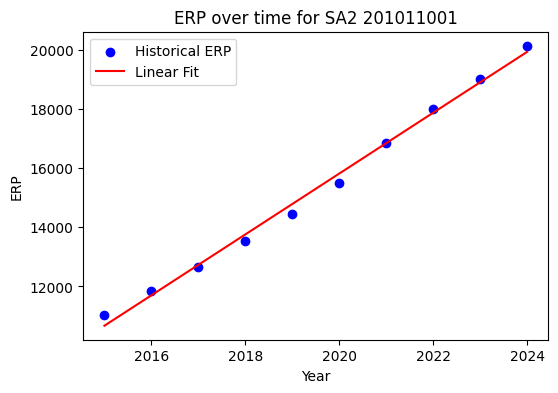

In [ ]:
# Columns for historical ERP
years = np.array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

# Example for a single SA2
sa2_code = '201011001'  
sa2_data = combined[combined['sa2_code'] == sa2_code]

erp_values = sa2_data[['erp_2015','erp_2016','erp_2017','erp_2018','erp_2019',
                       'erp_2020','erp_2021','erp_2022','erp_2023','erp_2024']].values.flatten()

# Fit linear regression
X = years.reshape(-1, 1)
y = erp_values
model = LinearRegression().fit(X, y)
r2 = model.score(X, y)
print(f"R² for SA2 {sa2_code}: {r2:.3f}")


plt.figure(figsize=(6,4))
plt.scatter(years, y, color='blue', label='Historical ERP')
plt.plot(years, model.predict(X), color='red', label='Linear Fit')
plt.title(f'ERP over time for SA2 {sa2_code}')
plt.xlabel('Year')
plt.ylabel('ERP')
plt.legend()
plt.show()


In [ ]:
years = np.array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])
X = years.reshape(-1,1)

r2_list = []

for sa2, group in combined.groupby('sa2_code'):
    y = group[['erp_2015','erp_2016','erp_2017','erp_2018','erp_2019',
               'erp_2020','erp_2021','erp_2022','erp_2023','erp_2024']].values.flatten()
    
    if np.any(np.isnan(y)):
        continue
    
    model = LinearRegression().fit(X, y)
    r2 = model.score(X, y)
    r2_list.append({'sa2_code': sa2, 'r2': r2})

r2_df = pd.DataFrame(r2_list)
print(r2_df.describe())  


               r2
count  522.000000
mean     0.625435
std      0.343267
min      0.000028
25%      0.316352
50%      0.746429
75%      0.950062
max      1.000000


Note: model explains 75% of variability for half of sa2s. About 25% of sa2s do not follow linear trend. Cud misrepresent some areas.

In [ ]:
results = []

years_train = np.array([2015, 2016, 2017, 2018, 2019, 2020, 2021]).reshape(-1, 1)
years_test  = np.array([2022, 2023, 2024]).reshape(-1, 1)

for sa2 in pop_df['sa2_code'].unique():
    df_sa2 = pop_df[pop_df['sa2_code'] == sa2]
    
    # Historical values
    y_train = df_sa2[['erp_2015','erp_2016','erp_2017','erp_2018','erp_2019','erp_2020','erp_2021']].values.flatten()
    
    if np.isnan(y_train).any():
        continue
    
    # Fit linear regression
    model = LinearRegression()
    model.fit(years_train, y_train)
    
    # Predict 2022-2024
    y_pred = model.predict(years_test)
    
    # Actuals
    y_actual = df_sa2[['erp_2022','erp_2023','erp_2024']].values.flatten()
    
    # Compute errors
    mae = mean_absolute_error(y_actual, y_pred)
    mape = mean_absolute_percentage_error(y_actual, y_pred) * 100
    
    results.append({'sa2_code': sa2, 'mae': mae, 'mape': mape})



In [ ]:
accuracy_summary = pd.DataFrame(results)

accuracy_summary.replace([np.inf, -np.inf], np.nan, inplace=True)

# Compute overall mean MAE and MAPE
overall = accuracy_summary[["mae", "mape"]].mean(skipna=True)

print("Overall accuracy metrics:")
print(overall)

Overall accuracy metrics:
mae     3.823859e+02
mape    2.403399e+15
dtype: float64


erm i fink kiv on linear reg cus i found data

## Linear Interpolation

In [ ]:

erp_cols = [col for col in combined_df.columns if col.startswith('erp_20')]


def interpolate_erp(row):
    # Extract year from column names
    years = [int(col.split('_')[1]) for col in erp_cols]
    values = row[erp_cols].values.astype(float)
    
    # Mask for non-NaN values
    mask = ~np.isnan(values)
    known_years = np.array(years)[mask]
    known_values = values[mask]
    
    # Interpolate for all years in range
    full_years = np.arange(min(years), max(years)+1)
    interpolated = np.interp(full_years, known_years, known_values)
    
    # Return as a Series with year-specific column names
    return pd.Series(interpolated, index=[f'erp_{y}' for y in full_years])

# Apply to all SA2s
erp_interpolated = combined_df.apply(interpolate_erp, axis=1)

combined_df_full = pd.concat([combined_df[['sa2_code']], erp_interpolated], axis=1)

combined_df_full.head()


,sa2_code,erp_2015,erp_2016,erp_2017,erp_2018,erp_2019,erp_2020,erp_2021,erp_2022,erp_2023,...,erp_2027,erp_2028,erp_2029,erp_2030,erp_2031,erp_2032,erp_2033,erp_2034,erp_2035,erp_2036
0,201011001,11039.0,11852.0,12649.0,13537.0,14434.0,15507.0,16841.0,18002.0,18995.0,...,21325.893697,21895.531232,22465.168766,23034.806301,23604.443836,24095.619230,24586.794624,25077.970018,25569.145413,26060.320807
1,201011002,12300.0,12301.0,12266.0,12244.0,12320.0,12196.0,12071.0,11938.0,11811.0,...,11719.320995,11740.348397,11761.375799,11782.403201,11803.430603,11839.942960,11876.455316,11912.967673,11949.480030,11985.992387
2,201011005,7191.0,7311.0,7409.0,7418.0,7458.0,7377.0,7229.0,7247.0,7323.0,...,7434.686493,7497.293213,7559.899932,7622.506652,7685.113372,7753.868146,7822.622920,7891.377695,7960.132469,8028.887243
3,201011006,6846.0,7195.0,7622.0,8183.0,8890.0,9755.0,10648.0,11798.0,12865.0,...,16827.266327,17739.346612,18651.426898,19563.507183,20475.587469,21373.510463,22271.433457,23169.356451,24067.279445,24965.202439
4,201011007,3966.0,3990.0,4004.0,4042.0,4112.0,4152.0,4211.0,4223.0,4267.0,...,4341.161505,4370.224481,4399.287456,4428.350431,4457.413406,4511.024293,4564.635179,4618.246065,4671.856951,4725.467837


### Backtest for evaluation

In [ ]:
erp_cols = [col for col in combined_df.columns if col.startswith('erp_20')]

def interpolate_erp_backtest(row, drop_years):
    years = np.array([int(col.split('_')[1]) for col in erp_cols])
    values = row[erp_cols].values.astype(float)
    
    # Temporarily remove selected years
    mask = ~np.isin(years, drop_years)
    known_years = years[mask]
    known_values = values[mask]
    
    full_years = np.arange(min(years), max(years)+1)
    interpolated = np.interp(full_years, known_years, known_values)
    
    return pd.Series(interpolated, index=[f'erp_{y}' for y in full_years])

# years to hide for backtesting
drop_years = [2017, 2022, 2024]

results = []

for sa2 in combined_df['sa2_code'].unique():
    df_sa2 = combined_df[combined_df['sa2_code'] == sa2].iloc[0]  # single row per SA2
    
    # Interpolate
    interpolated = interpolate_erp_backtest(df_sa2, drop_years)
    
    # Actual values
    actual_values = df_sa2[[f'erp_{y}' for y in drop_years]].values.astype(float)
    pred_values = interpolated[[f'erp_{y}' for y in drop_years]].values.astype(float)
    
    if np.isnan(actual_values).any() or np.isnan(pred_values).any():
        continue
    
    # Compute errors
    mae = mean_absolute_error(actual_values, pred_values)
    mape = mean_absolute_percentage_error(actual_values, pred_values) * 100
    
    results.append({'sa2_code': sa2, 'mae': mae, 'mape': mape})

accuracy_summary = pd.DataFrame(results)
overall = accuracy_summary[['mae', 'mape']].mean()
print("Overall backtest metrics:")
print(overall)

Overall backtest metrics:
mae     115.363943
mape      1.135614
dtype: float64


In [669]:
# Save file
combined_df_full.to_csv("../datasets/raw/curated/full_erp_only_population_data.csv", index=False)
